<a href="https://colab.research.google.com/github/SachinCW/Springboard-Data-Science-Challenges/blob/master/Relax%20Data%20Science%20Challenge/DS_Challenge_1_Relax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime
# above lines get me the cell execution time.

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#above lines help me avoid warnings thrown by sklearn

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
 
#Files are in drive account of sachincw9@gmail.com
from google.colab import drive 
drive.mount('/content/gdrive') 
os.chdir('gdrive/My Drive/DS_Take_Home_Challenge')
!ls -ltr  

from google.colab import files
#files.download('relax_data_science_challenge.pdf') 


  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=78dac7d2fd16b8cb33affde2941db40af77c695f42960bfcdb8eb51c32e73d82
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
total 25469
-rw------- 1 root root  5832711 Dec  1 23:29 takehome_user_engagement.csv
-rw------- 1 root root  1162702 Dec  1 23:29 takehome_users.csv
-r

In [10]:

df_eng=pd.read_csv('takehome_user_engagement.csv',parse_dates=True)
df_user=pd.read_csv('takehome_users.csv', encoding='latin-1')
df_user.head()

time: 262 ms


In [13]:
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


time: 20.6 ms


In [14]:
df_eng.drop(columns=['visited'],axis=0,inplace=True) # only value in visited column is 1. Hence, it can be dropped.

# Convert time_stamp field's data type from object to datetime64 so that we can extract week and year information from it.
# Then, Create date field from timestamp and drop timestamp field.

df_eng['time_stamp']=pd.to_datetime(df_eng['time_stamp'])
print(df_eng.info())
df_eng['date']=df_eng['time_stamp'].dt.date
df_eng.drop(columns=['time_stamp'],axis=0,inplace=True)


#Drop duplicates - meaning drop multiple logins on the same day.
df_eng.drop_duplicates(inplace=True)
df_eng.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 2 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 MB
None


,user_id,date
0,1,2014-04-22
1,2,2013-11-15
2,2,2013-11-29
3,2,2013-12-09
4,2,2013-12-25


time: 203 ms


THE ASK : Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption 


From the below result, we find that login information is present from may 2012 till june 2014. So, we will have to extract the week as well as the year from the date field.

In [15]:
min(df_eng.date),max(df_eng.date)

(datetime.date(2012, 5, 31), datetime.date(2014, 6, 6))

time: 46.5 ms


In [16]:
df_eng.date=pd.to_datetime(df_eng.date)
df_eng['week']=df_eng.date.dt.week
df_eng['year']=df_eng.date.dt.year
df_eng.drop(columns=['date'],inplace=True)
df_eng.head()

# Do a row level group counts and extract records with counts 3 or more. This means the users that logged in more than twice in a given week will get fetched.

df_eng=df_eng.groupby(['user_id','week','year']).size().reset_index(name='counts')
df_eng=df_eng[df_eng.counts>2]
# Create a new column called Adoped and set it to 1 and drop columns not needed for further analysis.
df_eng['Adopted']=1
df_eng.drop(columns=['week','counts','year'],inplace=True)
df_eng.drop_duplicates(inplace=True)
print("DF ENGAGEMENT HEAD: \n",df_eng.head())
print("DF ENGAGEMENT COUNT: \n",df_eng.count())
# join user and engagement.
df_user=df_user.merge(df_eng,how='left',left_on='object_id',right_on='user_id',indicator=True)
print("DF USER COUNT: \n",df_user.count())

# Drop irrelevant columns for modeling.
df_user.drop(columns=['user_id','_merge','email','name'],inplace=True)
df_user.Adopted.fillna(0,inplace=True)
df=df_user.copy()
df.head()

DF ENGAGEMENT HEAD: 
      user_id  Adopted
3          2        1
18        10        1
97        20        1
111       33        1
127       42        1
DF ENGAGEMENT COUNT: 
 user_id    1444
Adopted    1444
dtype: int64
DF USER COUNT: 
 object_id                     12000
creation_time                 12000
name                          12000
email                         12000
creation_source               12000
last_session_creation_time     8823
opted_in_to_mailing_list      12000
enabled_for_marketing_drip    12000
org_id                        12000
invited_by_user_id             6417
user_id                        1444
Adopted                        1444
_merge                        12000
dtype: int64


,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


time: 228 ms


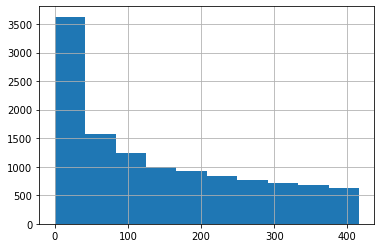

time: 213 ms


In [17]:
df.org_id.hist()

In [18]:
df.org_id.isnull().value_counts()

False    12000
Name: org_id, dtype: int64

time: 8.27 ms


The above exploratory analysis was done to check if there are blank values in org_id and to get the histogram of org ids. It is clear that there are over 400 organizations and the bulk of them have ids from 1 to around 125.
Since the unique values of this field are so huge, it may not be a good candidate to be considered as  a categorical field that can be included in the modelling..

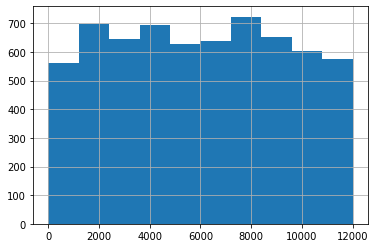

time: 272 ms


In [19]:
df.invited_by_user_id.hist()

The above exploratory analysis was done to check if there are blank values in invited_by_user_id field and to get its histogram . It is clear that there are many users who have invited many users.   It may not be a good candidate to be considered as feature directly that can be included in the modelling.. Instead, we can derive if a particular user has been invited by an existing user or not and that derived feature can be used in modelling based on how much impact it has on the target value.

In [20]:
df.invited_by_user_id.isnull().value_counts()

False    6417
True     5583
Name: invited_by_user_id, dtype: int64

time: 8.76 ms


In [21]:
df.count()

object_id                     12000
creation_time                 12000
creation_source               12000
last_session_creation_time     8823
opted_in_to_mailing_list      12000
enabled_for_marketing_drip    12000
org_id                        12000
invited_by_user_id             6417
Adopted                       12000
dtype: int64

time: 9.24 ms


In [22]:

from datetime import datetime

df.creation_time=pd.to_datetime(df.creation_time)

df[df['last_session_creation_time'].notnull()]
df['last_session_time'] = df[df['last_session_creation_time'].notnull()]['last_session_creation_time'].apply(datetime.fromtimestamp) 
df['creation_login_gap']=( df[df.last_session_time.notnull()].last_session_time -  df[df.last_session_time.notnull()].creation_time )/ np.timedelta64(1, 'D')

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
Adopted                       12000 non-null float64
last_session_time             8823 non-null datetime64[ns]
creation_login_gap            8823 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(4), object(1)
memory usage: 1.1+ MB
None


,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted,last_session_time,creation_login_gap
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,2014-04-22 03:53:30,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,2014-03-31 03:45:04,136.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,2013-03-19 23:14:52,0.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,2013-05-22 08:09:28,1.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,2013-01-22 10:14:20,5.0


time: 87.7 ms


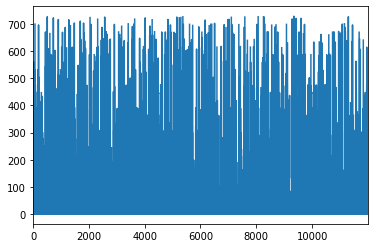

time: 241 ms


In [26]:
df.creation_login_gap.plot()

In [27]:
df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted,creation_login_gap
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000,12000.000000,8823.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145,0.120333,59.222147
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968,0.325364,144.172167
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000,0.000000,0.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000,0.000000,1.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000,0.000000,20.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,1.000000,729.000000


time: 52 ms


In [29]:
df.creation_login_gap.isnull().value_counts()

False    8823
True     3177
Name: creation_login_gap, dtype: int64

time: 8 ms


In [30]:
#Create a categorical column based on whether user was invited by an existing user
df['invited']=np.where(df['invited_by_user_id'].isnull(),0,1)
df.Adopted=df.Adopted.astype(int)

#We have 3177 records with no information about the user's last session login time and hence, the creation_login_gap has null in 3177 records. They need to be set to 0. 
df['creation_login_gap']=np.where(df['creation_login_gap'].isnull(),0,df['creation_login_gap'])

# drop object_id( unique identifier) and creation time.
# Also, drop org_id and invited_by_user_id. This is because they are again just qualitative information ( like a large list of categorical values) and not quantitative information
df.drop(columns=['org_id','object_id','invited_by_user_id','creation_time'],inplace=True)
df.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,Adopted,last_session_time,creation_login_gap,invited
0,GUEST_INVITE,1.398139e+09,1,0,0,2014-04-22 03:53:30,0.0,1
1,ORG_INVITE,1.396238e+09,0,0,1,2014-03-31 03:45:04,136.0,1
2,ORG_INVITE,1.363735e+09,0,0,0,2013-03-19 23:14:52,0.0,1
3,GUEST_INVITE,1.369210e+09,0,0,0,2013-05-22 08:09:28,1.0,1
4,GUEST_INVITE,1.358850e+09,0,0,0,2013-01-22 10:14:20,5.0,1


time: 40.9 ms


In [33]:
df.Adopted.value_counts()


0    10556
1     1444
Name: Adopted, dtype: int64

time: 25.9 ms


We find from the above that there are 1444 Adoped users from amongst 12000 users. This is a highly imbalanced dataset.


In [34]:
'''from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
creation_labels = gle.fit_transform(df['creation_source'])
df.creation_source = creation_labels
'''


"from sklearn.preprocessing import LabelEncoder\n\ngle = LabelEncoder()\ncreation_labels = gle.fit_transform(df['creation_source'])\ndf.creation_source = creation_labels\n"

time: 4.47 ms


In [35]:
df.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,Adopted,last_session_time,creation_login_gap,invited
0,GUEST_INVITE,1.398139e+09,1,0,0,2014-04-22 03:53:30,0.0,1
1,ORG_INVITE,1.396238e+09,0,0,1,2014-03-31 03:45:04,136.0,1
2,ORG_INVITE,1.363735e+09,0,0,0,2013-03-19 23:14:52,0.0,1
3,GUEST_INVITE,1.369210e+09,0,0,0,2013-05-22 08:09:28,1.0,1
4,GUEST_INVITE,1.358850e+09,0,0,0,2013-01-22 10:14:20,5.0,1


time: 34.3 ms


In [36]:
X=df[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','invited']]
y=df['Adopted']
X = X.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1,stratify=y)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (8040, 4) (8040,)
Test (3960, 4) (3960,)
time: 47.2 ms


In [49]:
X=df[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','invited','creation_login_gap']]
y=df['Adopted']

X1 = pd.get_dummies(X, columns = ['creation_source'])


X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=1,stratify=y)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (8040, 9) (8040,)
Test (3960, 9) (3960,)
time: 33 ms


In [48]:
X1.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,creation_login_gap,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,1,0.0,1,0,0,0,0
1,0,0,1,136.0,0,1,0,0,0
2,0,0,1,0.0,0,1,0,0,0
3,0,0,1,1.0,1,0,0,0,0
4,0,0,1,5.0,1,0,0,0,0


time: 28.3 ms


In [50]:


from sklearn.ensemble import RandomForestClassifier

#train and test classifier
rf = RandomForestClassifier(class_weight='balanced_subsample')

rf.fit(X_train, y_train)

rf.score(X_test, y_test)



0.9656565656565657

time: 711 ms


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

#print out classification report and confusion matrix
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3483
           1       0.84      0.88      0.86       477

    accuracy                           0.97      3960
   macro avg       0.91      0.93      0.92      3960
weighted avg       0.97      0.97      0.97      3960

confusion matrix:
[[3402   81]
 [  55  422]]
time: 74 ms


In [53]:
#make a df that displays the cofficients indexed by feature name
feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(X1.columns)
feature_importance.coef.nlargest(10)

creation_login_gap                    0.979723
creation_source_PERSONAL_PROJECTS     0.006898
opted_in_to_mailing_list              0.003579
enabled_for_marketing_drip            0.002595
creation_source_GUEST_INVITE          0.001649
creation_source_ORG_INVITE            0.001604
creation_source_SIGNUP_GOOGLE_AUTH    0.001558
creation_source_SIGNUP                0.001373
invited                               0.001022
Name: coef, dtype: float64

time: 28.3 ms


In [54]:
feature_importance.head()

,coef
opted_in_to_mailing_list,0.003579
enabled_for_marketing_drip,0.002595
invited,0.001022
creation_login_gap,0.979723
creation_source_GUEST_INVITE,0.001649


time: 16.1 ms


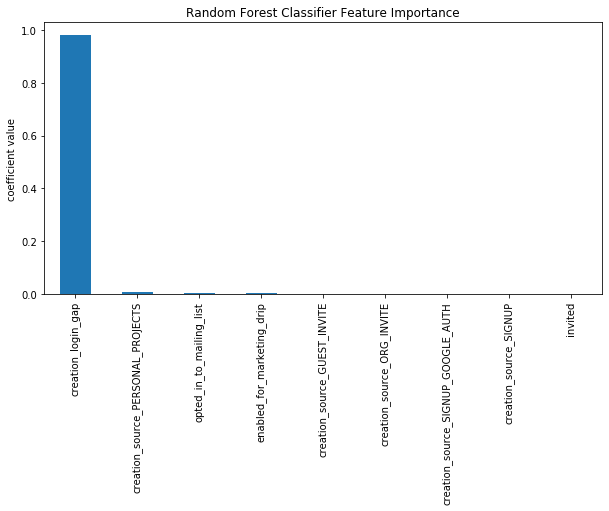

time: 252 ms


In [55]:
#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
(feature_importance['coef']).nlargest(10).plot(kind='bar', x=feature_importance.index)
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('coefficient value')
plt.show()

#ECDF
https://towardsdatascience.com/what-why-and-how-to-read-empirical-cdf-123e2b922480

In [56]:
#define func to find ecdf of dataset
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

adopted = df.creation_login_gap.loc[df['Adopted'] == 1]
not_adopted = df.creation_login_gap.loc[df['Adopted'] == 0]

time: 9.58 ms


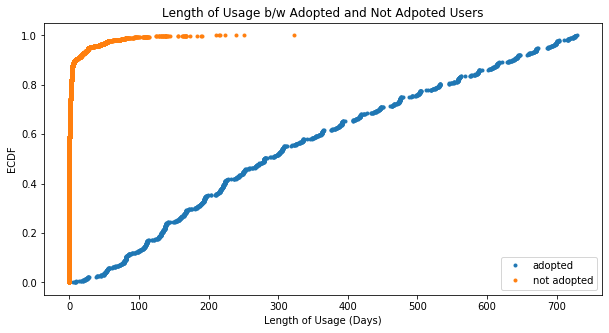

time: 297 ms


In [57]:
#set fig size
%matplotlib inline
plt.figure(figsize=(10,5))

x_active, y_active = ecdf(adopted)
x_inactive, y_inactive = ecdf(not_adopted)

plt.plot(x_active, y_active, marker='.', linestyle='none')
plt.plot(x_inactive, y_inactive, marker='.', linestyle='none')
plt.title('Length of Usage b/w Adopted and Not Adpoted Users')
plt.xlabel('Length of Usage (Days)')
plt.ylabel('ECDF')
plt.legend(['adopted', 'not adopted'])
plt.show()


# References

https://github.com/olsenben/relax-data-science-challenge/blob/master/relax-data-science-challenge.ipynb

https://github.com/Capella35/Data-Science-Take-Home-Challenge/blob/master/Relax%2BInc.%2BData%2BScience%2BChallenge%20(2).ipynb

https://github.com/carlosbrown2/relax-challenge/blob/master/relax%20data%20challenge.ipynb




# Summary


Following are the fields that are part of the user dataset.



1.   object_id	
2.   creation_time	
3.   name
4.   email
5.   creation_source
6.   last_session_creation_time
7.   opted_in_to_mailing_list 
8.   enabled_for_marketing_drip
9.   org_id
10.  invited_by_user_id
	
	


We used the features in the user engagement dataset to create a derived feature called Adopted. Definition of an  "adopted  user"   is  a  user  who   has  logged  into  the  product  on  three  separate 
days  in  at  least  one  seven­day  period. The ask was to  identify  which  factors  predict  future  user  adoption.

The following fields obviously cannot be used for prediction - 


*   object_id
*   name
*   email
*   org_id
*   invited_by_user_id


Therefore they were dropped from the dataset. A feature 'invited' was engineered from the field - invited_by_user_id and was selected for modelling. 
A feature called 'creation_login_gap' was created which was the difference in number of days between creation_time and last_session_creation_time.


So, the following fields were selected for modelling initially.



*   creation_source
*   opted_in_to_mailing_list
*   enabled_for_marketing_drip
*   invited
*   creation_login_gap
	
	
The categorical feature creation_source had the below values and it seemed like a feature that could potentially influence in a user adoption. Hence, it was encoded and encoded features were created for creation_source.


*   GUEST_INVITE
*   ORG_INVITE
*   PERSONAL_PROJECTS
*   SIGNUP
*   SIGNUP_GOOGLE_AUTH
 	

Random forest Classifier was used with a parameter value balanced set to 'balanced_subsample' as the dataset was highly imbalanced.

Following was the result of classification which is pretty good.

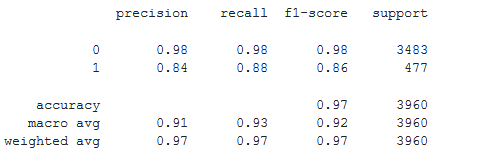


We then found out the features by their importance provided by the random forest classifier.

FEATURES                      &                       RELATIVE IMPORTANCE

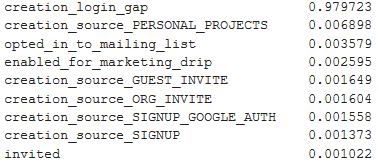



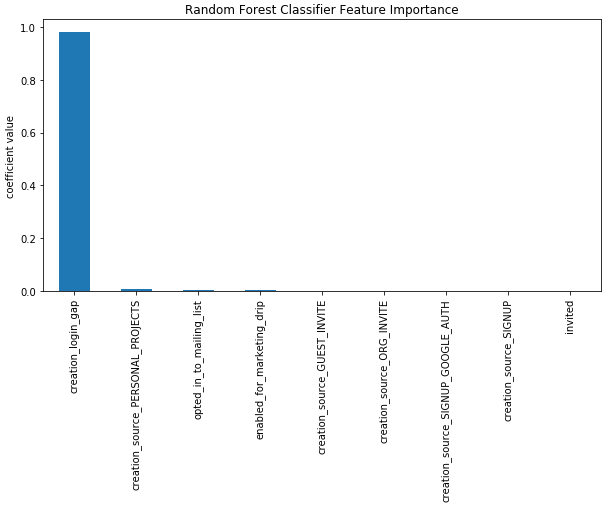


It can be clearly seen that the the creation_login_gap is the biggest contributer to the modelling  task. Other's don't really contribute a lot to the modelling task.


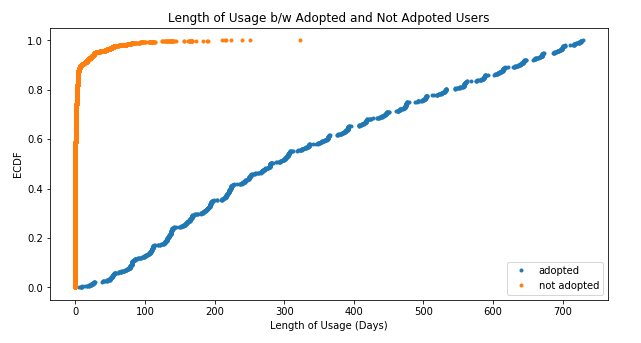

The ECDF plot also confirms that there is a large proportion of the non adoped users with the creation_login_gap value less than that of the adopted users.